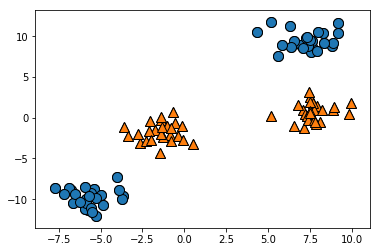

In [6]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y=make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

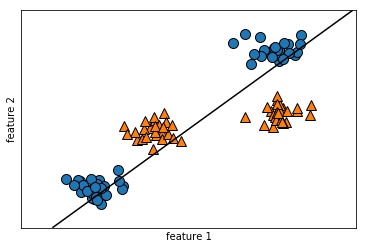

In [11]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

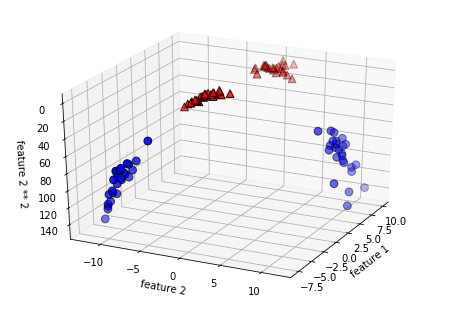

In [15]:
X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()
ax=Axes3D(figure, elev=-152,azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 2 ** 2')
plt.show()

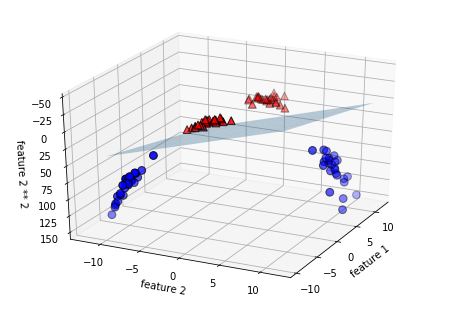

In [23]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure=plt.figure()
ax=Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 2 ** 2')

plt.show()

In [37]:
X,y=make_blobs(random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y)
svm=SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train,y_train)

print("Accuracy train: {}".format(svm.score(X_train,y_train)))
print("Accuracy test: {}".format(svm.score(X_test,y_test)))


Accuracy train: 1.0
Accuracy test: 1.0


In [49]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)

svm=SVC(kernel='rbf', C=1, gamma=0.001).fit(X_train,y_train)

print("Accuracy train: {}".format(svm.score(X_train,y_train)))
print("Accuracy test: {}".format(svm.score(X_test,y_test)))


Accuracy train: 0.9765258215962441
Accuracy test: 0.9300699300699301


In [51]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)

svm=SVC(kernel='rbf', C=10, gamma=0.0001).fit(X_train,y_train)

print("Accuracy train: {}".format(svm.score(X_train,y_train)))
print("Accuracy test: {}".format(svm.score(X_test,y_test)))


Accuracy train: 0.971830985915493
Accuracy test: 0.958041958041958


In [52]:
#let's scale the BC data to put all the features between 0 and 1

In [55]:
min_on_training=X_train.min(axis=0)
range_on_training=(X_train-min_on_training).max(axis=0)
X_train_scaled=(X_train-min_on_training)/range_on_training
X_test_scaled=(X_test-min_on_training)/range_on_training
print("max for each feature: \n{}".format(X_train_scaled.max(axis=0)))
print("min for each feature: \n{}".format(X_train_scaled.min(axis=0)))

max for each feature: 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
min for each feature: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [57]:
svc=SVC()
svc.fit(X_train_scaled,y_train)
print("Accuracy on train data: {}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test data: {}".format(svc.score(X_test_scaled,y_test)))

Accuracy on train data: 0.9483568075117371
Accuracy on test data: 0.951048951048951


In [58]:
# after scaling, we're now underfitting

In [59]:
svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print("Accuracy on train data: {}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test data: {}".format(svc.score(X_test_scaled,y_test)))

Accuracy on train data: 0.9882629107981221
Accuracy on test data: 0.972027972027972
